In [21]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import scipy

df = pd.read_csv('GDPpercapita.csv', low_memory=False)
df2 = pd.read_csv('domesticcredit.csv', low_memory=False)
df3 = pd.read_csv('ruralpopaspercentage.csv', low_memory=False)
df4 = pd.read_csv('MasterDataSet_updated.csv', low_memory=False)
df2.head()


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,58.46,57.41,nan,nan,nan,nan,nan,nan
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,11.52,4.92,4.34,4.34,4.03,3.96,3.60,nan
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,20.22,20.18,22.26,23.39,22.89,27.22,21.13,nan
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,37.51,39.46,39.06,38.01,37.53,35.64,34.72,nan
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,nan,nan,nan,nan,nan,nan,nan,nan


In [2]:
dfgdp = df.drop(df.columns[[2,3,4,5,6,7,8,9,10,12]], axis = 1)
dfdomcred = df2.drop(df2.columns[[2,3,4,5,6,7,8,9,11]], axis = 1)
dfruralpop = df3.drop(df3.columns[[2,3,4,5,6,7,8,9,11]], axis = 1)


In [3]:
dfruralpop.head()

,Country Name,Country Code,2016
0,Aruba,ABW,58.696
1,Afghanistan,AFG,72.868
2,Angola,AGO,55.181
3,Albania,ALB,41.624
4,Andorra,AND,15.388


In [4]:
pd.options.display.float_format = '{:,.2f}'.format
dfgdp.head()

,Country Name,Country Code,2017
0,Aruba,ABW,"25,655.10"
1,Afghanistan,AFG,550.07
2,Angola,AGO,"4,100.29"
3,Albania,ALB,"4,537.58"
4,Andorra,AND,"39,146.55"


In [5]:
table = pd.merge(dfruralpop,dfgdp, on='Country Code')
merge_table = pd.merge(table,dfdomcred, on='Country Code')

In [6]:
merge_table.head()

,Country Name_x,Country Code,2016_x,Country Name_y,2017,Country Name,2016_y
0,Aruba,ABW,58.70,Aruba,"25,655.10",Aruba,nan
1,Afghanistan,AFG,72.87,Afghanistan,550.07,Afghanistan,3.60
2,Angola,AGO,55.18,Angola,"4,100.29",Angola,21.13
3,Albania,ALB,41.62,Albania,"4,537.58",Albania,34.72
4,Andorra,AND,15.39,Andorra,"39,146.55",Andorra,nan


In [7]:
merge2 = merge_table.drop(merge_table.columns[[3,5]], axis = 1)
merge2.head()

,Country Name_x,Country Code,2016_x,2017,2016_y
0,Aruba,ABW,58.70,"25,655.10",nan
1,Afghanistan,AFG,72.87,550.07,3.60
2,Angola,AGO,55.18,"4,100.29",21.13
3,Albania,ALB,41.62,"4,537.58",34.72
4,Andorra,AND,15.39,"39,146.55",nan


In [8]:
merge2.rename(columns={'Country Name_x':'Country','2016_x':'% of Rural Pop.','2017':'GDP Per Capita','2016_y':'Dom. Credit to Prvt Sector as % of GDP'}, inplace=True)

In [9]:
merge_final = merge2.sort_values(by=['GDP Per Capita'], ascending=False)
merge_final.head(25)

,Country,Country Code,% of Rural Pop.,GDP Per Capita,Dom. Credit to Prvt Sector as % of GDP
142,Luxembourg,LUX,9.57,"104,103.04",102.39
144,"Macao SAR, China",MAC,0.00,"80,892.82",118.10
35,Switzerland,CHE,26.01,"80,189.70",175.26
175,Norway,NOR,19.27,"75,504.57",144.80
112,Iceland,ISL,5.77,"70,056.87",87.32
109,Ireland,IRL,36.47,"69,330.69",47.45
198,Qatar,QAT,0.68,"63,249.42",79.38
249,United States,USA,18.21,"59,531.66",192.17
168,North America,NAC,18.19,"58,070.07",192.17
206,Singapore,SGP,0.00,"57,714.30",132.91


In [10]:
df4.head()

,Unnamed: 0,id,loan_amount,sector,country_code,Country,currency,partner_id,lender_count,fundedtime,...,Currency ID,Rate in USD_x,Continent_Name,Continent_Code,Loan Theme Type,world_region,MPI,lat,lon,Loan amount in USD
0,0,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,PKR,139.65,Asia,AS,Underserved,South Asia,0.18,31.17,72.71,4.12
1,1,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,PKR,139.65,Asia,AS,Underserved,South Asia,0.29,25.89,68.52,4.12
2,2,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,PKR,139.65,Asia,AS,Underserved,South Asia,0.25,34.95,72.33,4.12
3,3,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,PKR,139.65,Asia,AS,Underserved,South Asia,0.40,28.49,65.10,4.12
4,4,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,PKR,139.65,Asia,AS,Underserved,South Asia,0.23,35.80,74.98,4.12


In [11]:
final_table = pd.merge(df4,merge_final, on='Country')
final_table.head(25)

,Unnamed: 0,id,loan_amount,sector,country_code,Country,currency,partner_id,lender_count,fundedtime,...,Loan Theme Type,world_region,MPI,lat,lon,Loan amount in USD,Country Code,% of Rural Pop.,GDP Per Capita,Dom. Credit to Prvt Sector as % of GDP
0,0,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,Underserved,South Asia,0.18,31.17,72.71,4.12,PAK,60.78,"1,547.85",16.51
1,1,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,Underserved,South Asia,0.29,25.89,68.52,4.12,PAK,60.78,"1,547.85",16.51
2,2,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,Underserved,South Asia,0.25,34.95,72.33,4.12,PAK,60.78,"1,547.85",16.51
3,3,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,Underserved,South Asia,0.40,28.49,65.10,4.12,PAK,60.78,"1,547.85",16.51
4,4,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,Underserved,South Asia,0.23,35.80,74.98,4.12,PAK,60.78,"1,547.85",16.51
5,5,653053,575.00,Transportation,PK,Pakistan,PKR,247.00,14,2014-01-02 09:17:23,...,Underserved,South Asia,0.04,33.73,73.09,4.12,PAK,60.78,"1,547.85",16.51
6,6,653063,200.00,Arts,PK,Pakistan,PKR,247.00,8,2014-01-01 13:00:00,...,Underserved,South Asia,0.18,31.17,72.71,1.43,PAK,60.78,"1,547.85",16.51
7,7,653063,200.00,Arts,PK,Pakistan,PKR,247.00,8,2014-01-01 13:00:00,...,Underserved,South Asia,0.29,25.89,68.52,1.43,PAK,60.78,"1,547.85",16.51
8,8,653063,200.00,Arts,PK,Pakistan,PKR,247.00,8,2014-01-01 13:00:00,...,Underserved,South Asia,0.25,34.95,72.33,1.43,PAK,60.78,"1,547.85",16.51
9,9,653063,200.00,Arts,PK,Pakistan,PKR,247.00,8,2014-01-01 13:00:00,...,Underserved,South Asia,0.40,28.49,65.10,1.43,PAK,60.78,"1,547.85",16.51


In [12]:
result_df = final_table.drop_duplicates(subset=['id'], keep='first')

In [13]:
#find the continent with highest loan borrowers
highest_Continent_group = result_df.groupby(['world_region']).agg({'borrowergenders' :"count"})



#Gender_group.reset_index()

highest_Continent_group.apply(pd.Series)
highest_Continent_group

,borrowergenders
world_region,
Arab States,3877
East Asia and the Pacific,196694
Europe and Central Asia,28064
Latin America and Caribbean,80369
South Asia,36500
Sub-Saharan Africa,124697


In [185]:
world_region_group = result_df.groupby(['world_region']).agg({'Loan amount in USD' :"sum"})

world_region_group=world_region_group.reset_index()

world_region_group.apply(pd.Series)

world_region_group

,world_region,Loan amount in USD
0,Arab States,"5,810,793.22"
1,East Asia and the Pacific,"1,091,324.11"
2,Europe and Central Asia,"2,725,504.76"
3,Latin America and Caribbean,"11,424,036.06"
4,South Asia,"174,179.32"
5,Sub-Saharan Africa,"1,373,875.90"


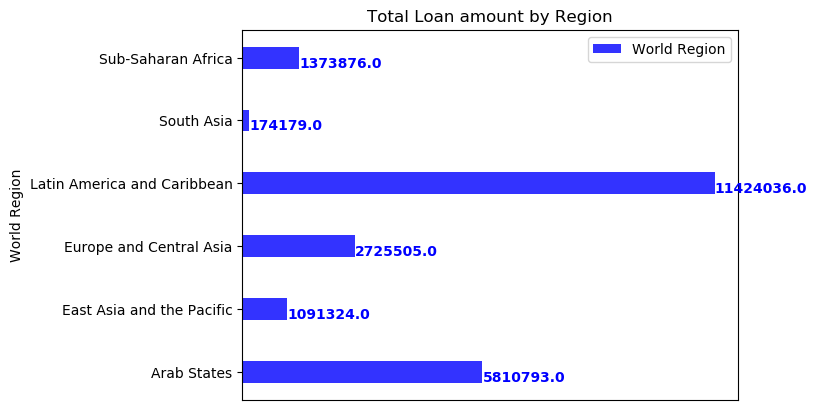

In [196]:
import matplotlib.ticker as ticker
plt.rcdefaults()

# create plot
fig, ax = plt.subplots()
index = np.arange(len(world_region_group['Loan amount in USD']))
bar_width = 0.35
opacity = 0.8
y = round(world_region_group['Loan amount in USD'])
#z=round(world_region_group['male'],2)
#plt.grid(color='r', linestyle='-', linewidth=2) 
#v=5
rects1 = plt.barh(index, y , bar_width, alpha=opacity, color='b', label='World Region')
 
#rects2 = plt.barh(index +bar_width, z, bar_width, alpha=opacity, color='g', label='Men')

for i, v in enumerate(y):
    ax.text(v +1, i-.15, str(v), color='b', fontweight='bold')

#for i, v in enumerate(z):
    #ax.text(v+2, i + .20, str(v), color='g', fontweight='bold')
plt.xlabel('Loan amount in $')
plt.ylabel('World Region')
plt.title('Total Loan amount by Region')
plt.yticks(index , world_region_group['world_region'])
plt.legend()
ax.xaxis.set_visible(False)
#plt.tight_layout()
plt.savefig("images/Fig4.png")
plt.show()

In [14]:
Gender_group = result_df.groupby(["borrowergenders", 'world_region']).agg({'world_region' :"count"})

#Gender_group.reset_index()

Gender_group.apply(pd.Series)
Gender_group.rename(columns= {"world_region":"Total"})
Gender_group

world_region
borrowergenders world_region                             
female          Arab States                          2560
                East Asia and the Pacific          181526
                Europe and Central Asia             19855
                Latin America and Caribbean         51725
                South Asia                          35537
                Sub-Saharan Africa                  84908
male            Arab States                          1317
                East Asia and the Pacific           15168
                Europe and Central Asia              8209
                Latin America and Caribbean         28644
                South Asia                            963
                Sub-Saharan Africa                  39789

In [15]:
renamedf = Gender_group.rename(columns= {"world_region":"Total"})
renamedf

Total
borrowergenders world_region                       
female          Arab States                    2560
                East Asia and the Pacific    181526
                Europe and Central Asia       19855
                Latin America and Caribbean   51725
                South Asia                    35537
                Sub-Saharan Africa            84908
male            Arab States                    1317
                East Asia and the Pacific     15168
                Europe and Central Asia        8209
                Latin America and Caribbean   28644
                South Asia                      963
                Sub-Saharan Africa            39789

In [16]:
groupdf= renamedf.pivot_table(index=['world_region'], columns='borrowergenders', values='Total', fill_value='').rename_axis('', axis=1).reset_index()
        
#groupdf= groupdf.set_index('Continent')
groupdf.rename(columns= {"world_region":"World Region"})
# Preview that Reformatting worked
groupdf

,world_region,female,male
0,Arab States,2560,1317
1,East Asia and the Pacific,181526,15168
2,Europe and Central Asia,19855,8209
3,Latin America and Caribbean,51725,28644
4,South Asia,35537,963
5,Sub-Saharan Africa,84908,39789


In [152]:
groupdf.rename(columns= {"world_region":"World Region"})

,World Region,female,male
0,Arab States,2560,1317
1,East Asia and the Pacific,181526,15168
2,Europe and Central Asia,19855,8209
3,Latin America and Caribbean,51725,28644
4,South Asia,35537,963
5,Sub-Saharan Africa,84908,39789


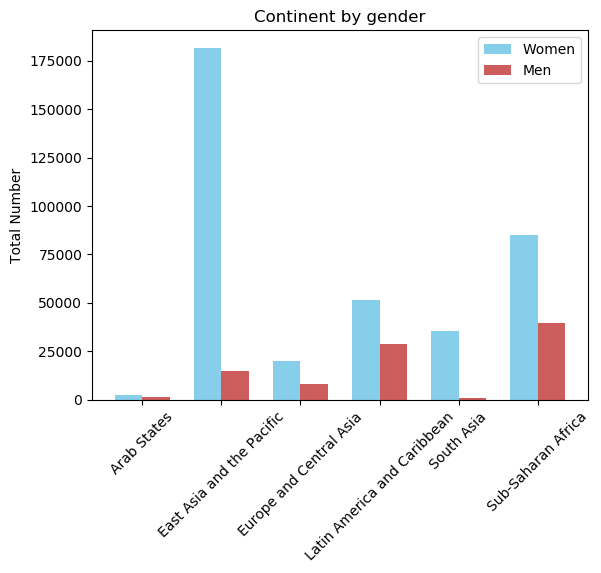

<Figure size 640x480 with 0 Axes>

In [153]:
y = groupdf['female']
z=groupdf['male']

plt.rcdefaults()

ind = np.arange(len(z))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar( ind - width/2, y,  width, color='SkyBlue', label='Women')
rects2 = ax.bar( ind + width/2, z,   width, color='IndianRed', label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Number')
ax.set_title('Continent by gender')
ax.set_xticks(ind)
ax.set_xticklabels(('Arab States', 'East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and Caribbean', 'South Asia','Sub-Saharan Africa'))
ax.legend()
plt.xticks(rotation=45)


                   
plt.show()
plt.savefig("images/Fig1.png") 

In [120]:
Avg_loan_group = result_df.groupby(['world_region','borrowergenders']).agg({'Loan amount in USD' :"mean"})

Avg_loan_group.apply(pd.Series)

Avg_loan_group.style.format("{:.2f}")
#df.groupby('A').ngroup(ascending=False)

In [29]:
result_df.to_csv('Final_table1.csv')

In [90]:
Avg_loan_chart= Avg_loan_group.pivot_table(index=['world_region'], columns='borrowergenders', values='Loan amount in USD', fill_value='').rename_axis('', axis=1).reset_index()
        
#groupdf= groupdf.set_index('Continent')
Avg_loan_chart.rename(columns= {"world_region":"World Region"})
# Preview that Reformatting worked
Avg_loan_chart

,world_region,female,male
0,Arab States,"1,573.91","1,352.76"
1,East Asia and the Pacific,5.41,7.17
2,Europe and Central Asia,85.97,124.08
3,Latin America and Caribbean,153.86,120.99
4,South Asia,4.63,9.84
5,Sub-Saharan Africa,12.36,8.14


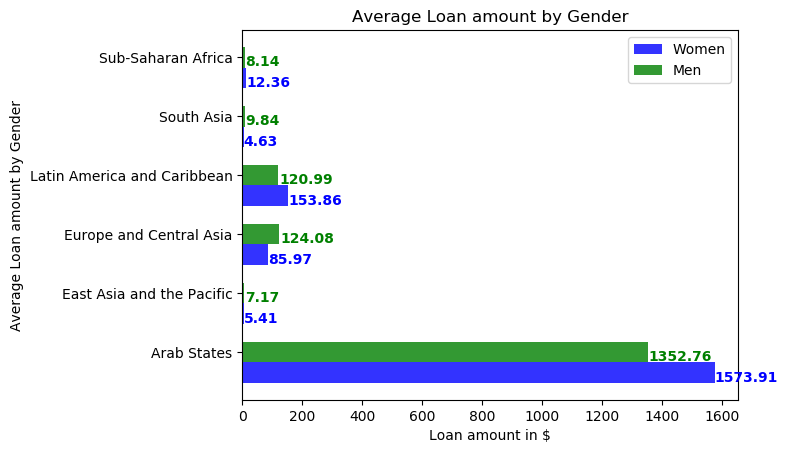

In [171]:
import matplotlib.ticker as ticker
plt.rcdefaults()

# create plot
fig, ax = plt.subplots()
index = np.arange(len(Avg_loan_chart['world_region']))
bar_width = 0.35
opacity = 0.8
y = round(Avg_loan_chart['female'], 2)
z=round(Avg_loan_chart['male'],2)
#plt.grid(color='r', linestyle='-', linewidth=2) 
#v=5
rects1 = plt.barh(index, y , bar_width, alpha=opacity, color='b', label='Women')
 
rects2 = plt.barh(index +bar_width, z, bar_width, alpha=opacity, color='g', label='Men')

for i, v in enumerate(y):
    ax.text(v +1, i-.15, str(v), color='b', fontweight='bold')

for i, v in enumerate(z):
    ax.text(v+2, i + .20, str(v), color='g', fontweight='bold')
plt.xlabel('Loan amount in $')
plt.ylabel('Average Loan amount by Gender')
plt.title('Average Loan amount by Gender')
plt.yticks(index + bar_width, Avg_loan_chart['world_region'])
plt.legend()

#plt.tight_layout()
plt.savefig("images/Fig2.png")
plt.show()

In [175]:
sector_group = result_df.groupby(["borrowergenders", "sector" ]).agg({'borrowergenders' :"count"})

sector_group.apply(pd.Series)

sector_group= sector_group.rename(columns= {"borrowergenders":"Total"})
sector_group=sector_group.reset_index()
sector_group


,borrowergenders,sector,Total
0,female,Agriculture,94366
1,female,Arts,6927
2,female,Clothing,16134
3,female,Construction,2208
4,female,Education,11425
5,female,Entertainment,253
6,female,Food,87881
7,female,Health,4224
8,female,Housing,15494
9,female,Manufacturing,3123


In [176]:
total_loan_group = result_df.groupby(['world_region','borrowergenders']).agg({'Loan amount in USD' :"sum"})

total_loan_group.apply(pd.Series)

total_loan_group.style.format("{:.2f}")

In [177]:
total_loan_groupdf= total_loan_group.pivot_table(index=['world_region'], columns='borrowergenders', values='Loan amount in USD', fill_value='').rename_axis('', axis=1).reset_index()
        
#groupdf= groupdf.set_index('Continent')
total_loan_groupdf.rename(columns= {"world_region":"World Region"})
# Preview that Reformatting worked
total_loan_groupdf

,world_region,female,male
0,Arab States,"4,029,208.03","1,781,585.19"
1,East Asia and the Pacific,"982,593.00","108,731.11"
2,Europe and Central Asia,"1,706,934.09","1,018,570.67"
3,Latin America and Caribbean,"7,958,385.70","3,465,650.36"
4,South Asia,"164,699.83","9,479.49"
5,Sub-Saharan Africa,"1,049,860.20","324,015.70"


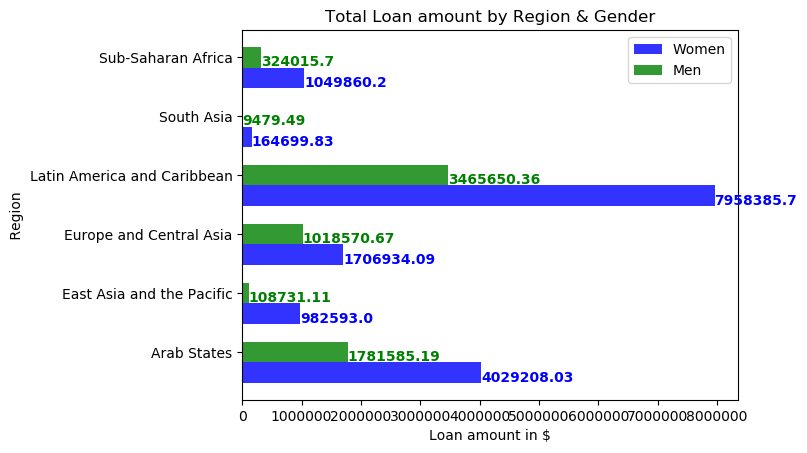

In [179]:
import matplotlib.ticker as ticker
plt.rcdefaults()

# create plot
fig, ax = plt.subplots()
index = np.arange(len(total_loan_groupdf['world_region']))
bar_width = 0.35
opacity = 0.8
y = round(total_loan_groupdf['female'], 2)
z=round(total_loan_groupdf['male'],2)
#plt.grid(color='r', linestyle='-', linewidth=2) 
#v=5
rects1 = plt.barh(index, y , bar_width, alpha=opacity, color='b', label='Women')
 
rects2 = plt.barh(index +bar_width, z, bar_width, alpha=opacity, color='g', label='Men')

for i, v in enumerate(y):
    ax.text(v +1, i-.15, str(v), color='b', fontweight='bold')

for i, v in enumerate(z):
    ax.text(v+2, i + .20, str(v), color='g', fontweight='bold')
plt.xlabel('Loan amount in $')
plt.ylabel(' Region ')
plt.title('Total Loan amount by Region & Gender')
plt.yticks(index + bar_width, Avg_loan_chart['world_region'])
plt.legend()

#plt.tight_layout()
plt.savefig("images/Fig2.png")
plt.show()